<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-rejection-optimization-parameters" data-toc-modified-id="Data-rejection-optimization-parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data rejection optimization parameters</a></span></li><li><span><a href="#Run-optimization-(long)" data-toc-modified-id="Run-optimization-(long)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run optimization (long)</a></span></li><li><span><a href="#Analyze-optimization-results" data-toc-modified-id="Analyze-optimization-results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyze optimization results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [6]:
import os
os.chdir("/home/tangir/crmbm/python/pastis")

from IPython import get_ipython
get_ipython().magic("clear")

import matplotlib.pylab as plt
import mrs.reco as reco
import mrs.log as log

plt.close("all")
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams["figure.figsize"] = [11, 8]
# get_ipython().magic("matplotlib inline")
get_ipython().magic("matplotlib notebook")
log.setLevel(log.INFO)

### Data rejection optimization parameters

In [3]:
import pandas as pd
import seaborn as sns
import itertools

# %% optim parameters
peak_snr_dict = {"NAA": [1.8, 2.2],
                 "Cre": [3, 3.15],
                 "Cho": [3.15, 3.3]}

df_list = []

datarej_realign_performed_list = [-2, -1, 0, 1, 2]
datarej_auto_allowed_snr_change_list = [0, 1, 10]
datarej_moving_averages_list = [1, 2, 5]
datarej_allowed_apodization_list = [0, 1, 5]

### Run optimization (long)

In [ ]:
realigning_big_list = itertools.product(datarej_realign_performed_list,
                      datarej_auto_allowed_snr_change_list,
                      datarej_moving_averages_list,
                      datarej_allowed_apodization_list)

for (a, b, c, d) in realigning_big_list:

    p = reco.pipeline()
    p.settings["POI_range_ppm"] = [4.5, 5.2]
    p.settings["POI_shift_range_ppm"] = [1.8, 2.2]
    p.settings["POI_shift_true_ppm"] = 2.008
    p.settings["POI_LW_range_ppm"] = [4.5, 5.2]
    p.settings["realigning_inter_corr_mode"] = False
    p.settings["display"] = False


    if(a == -2):
        # no realignment jobs, no data rej (ref)
        p.job_list = [  # p.job["displaying_anatomy"],
                    p.job["phasing"],
                    p.job["scaling"],
                    # p.job["FID modulus"],
                    p.job["channel_combining"],
                    # p.job["concatenate"],
                    # p.job["noise_estimation"],
                    p.job["zero_filling"],
                    # p.job["physio_analysis"],
                    # p.job["apodizing"],
                    p.job["averaging"],
                    p.job["apodizing"]
                    # p.job["calibrating"],
                    # p.job["water_removal"],
                    # p.job["cropping"],
                    # p.job["displaying"]
                    ]
    elif(a == -1):
        # realignment before
        p.job_list = [  # p.job["displaying_anatomy"],
                    p.job["phasing"],
                    p.job["scaling"],
                    # p.job["FID modulus"],
                    p.job["channel_combining"],
                    # p.job["concatenate"],
                    # p.job["noise_estimation"],
                    p.job["zero_filling"],
                    # p.job["physio_analysis"],
                    # p.job["apodizing"],
                    p.job["realigning"],
                    p.job["data_rejecting"],
                    p.job["averaging"],
                    p.job["apodizing"]
                    # p.job["calibrating"],
                    # p.job["water_removal"],
                    # p.job["cropping"],
                    # p.job["displaying"]
                    ]
    elif(a == 0):
        # no realignment jobs
        p.job_list = [  # p.job["displaying_anatomy"],
                    p.job["phasing"],
                    p.job["scaling"],
                    # p.job["FID modulus"],
                    p.job["channel_combining"],
                    # p.job["concatenate"],
                    # p.job["noise_estimation"],
                    p.job["zero_filling"],
                    # p.job["physio_analysis"],
                    # p.job["apodizing"],
                    p.job["data_rejecting"],
                    p.job["averaging"],
                    p.job["apodizing"]
                    # p.job["calibrating"],
                    # p.job["water_removal"],
                    # p.job["cropping"],
                    # p.job["displaying"]
                    ]
    elif(a == 1):
        # realignment after
        p.job_list = [  # p.job["displaying_anatomy"],
                    p.job["phasing"],
                    p.job["scaling"],
                    # p.job["FID modulus"],
                    p.job["channel_combining"],
                    # p.job["concatenate"],
                    # p.job["noise_estimation"],
                    p.job["zero_filling"],
                    # p.job["physio_analysis"],
                    # p.job["apodizing"],
                    p.job["data_rejecting"],
                    p.job["realigning"],
                    p.job["averaging"],
                    p.job["apodizing"]
                    # p.job["calibrating"],
                    # p.job["water_removal"],
                    # p.job["cropping"],
                    # p.job["displaying"]
                    ]
    elif(a == 2):
        # realignment before and after
        p.job_list = [  # p.job["displaying_anatomy"],
                    p.job["phasing"],
                    p.job["scaling"],
                    # p.job["FID modulus"],
                    p.job["channel_combining"],
                    # p.job["concatenate"],
                    # p.job["noise_estimation"],
                    p.job["zero_filling"],
                    # p.job["physio_analysis"],
                    # p.job["apodizing"],
                    p.job["realigning"],
                    p.job["data_rejecting"],
                    p.job["realigning"],
                    p.job["averaging"],
                    p.job["apodizing"]
                    # p.job["calibrating"],
                    # p.job["water_removal"],
                    # p.job["cropping"],
                    # p.job["displaying"]
                    ]

    p.job["realigning"]["moving_averages"] = 1
    p.job["realigning"]["inter_corr_mode"] = False
    p.job["realigning"]["freq_shift_max"] = 100.0
    p.job["realigning"]["allowed_apodization"] = 1.0

    p.job["data_rejecting"]["auto_allowed_snr_change"] = b
    p.job["data_rejecting"]["moving_averages"] = c
    p.job["data_rejecting"]["allowed_apodization"] = d

    p.job["apodizing"]["damping_hz"] = 15

    p.analyze_enable = False

    # 26/06/2019 - 296_ym_p1_brainmoelle - Yasmin :)
    p.dataset[0]["legend"] = "sLASER R:N=20:1"
    p.dataset[0]["dcm"]["files"] = ["/home/tangir/crmbm/acq/296_ym_p1_brainmoelle/296-ym-p1-brainmoelle/20190626/02_0016_slaser-r-n",
                                    "/home/tangir/crmbm/acq/296_ym_p1_brainmoelle/296-ym-p1-brainmoelle/20190626/02_0015_slaser-r-n"]
    p.dataset[0]["raw"]["files"] = ["/home/tangir/crmbm/acq_twix/296_ym_p1_brainmoelle/meas_MID157_slaser_R_N=20+_1_longTE_SNR++++_FID34191.dat",
                                    "/home/tangir/crmbm/acq_twix/296_ym_p1_brainmoelle/meas_MID155_slaser_R_N=20+_1_longTE_SNR++++_FID34189.dat"]

    # 23/09/2019 - 313-ft-p1-moelle - Fransiska :|
    p.dataset[1]["legend"] = "sLASER 20:1"
    p.dataset[1]["resp_bpm"] = 12
    p.dataset[1]["dcm"]["files"] = ["/home/tangir/crmbm/acq/313-ft-p1-moelle/20190923/01_0011_slaser-r-n/original-primary_e09_0001.dcm",
                                    "/home/tangir/crmbm/acq/313-ft-p1-moelle/20190923/01_0010_slaser-r-n/original-primary_e09_0001.dcm"]
    p.dataset[1]["raw"]["files"] = ["/home/tangir/crmbm/acq_twix/313-ft-p1-moelle/meas_MID68_slaser_R_N=20+_1_longTE_SNR++++_FID41500.dat",
                                    "/home/tangir/crmbm/acq_twix/313-ft-p1-moelle/meas_MID65_slaser_R_N=20+_1_longTE_SNR++++_FID41497.dat"]

    # 25/09/2019 - 314-yt-p1-moelle - Yolanda :)))
    p.dataset[2]["legend"] = "sLASER 20:1"
    p.dataset[2]["resp_bpm"] = 17
    p.dataset[2]["heart_bpm"] = 75
    p.dataset[2]["dcm"]["files"] = ["/home/tangir/crmbm/acq/314-yt-p1-moelle/20190925/01_0010_slaser-r-n",
                                    "/home/tangir/crmbm/acq/314-yt-p1-moelle/20190925/01_0009_slaser-r-n"]
    p.dataset[2]["raw"]["files"] = ["/home/tangir/crmbm/acq_twix/314-yt-p1-moelle/meas_MID83_slaser_R_N=20+_1_longTE_SNR++++_FID41681.dat",
                                    "/home/tangir/crmbm/acq_twix/314-yt-p1-moelle/meas_MID81_slaser_R_N=20+_1_longTE_SNR++++_FID41679.dat"]
    p.dataset[2]["physio-file"] = "/home/tangir/crmbm/acq_physio/314_YT_P1_MOELLE_2.resp"

    # 05/09/2019 - 311-sl-p1-moelle - Simon :))
    p.dataset[3]["legend"] = "sLASER 20:1"
    p.dataset[3]["resp_bpm"] = 16
    p.dataset[3]["heart_bpm"] = 55
    p.dataset[3]["dcm"]["files"] = ["/home/tangir/crmbm/acq/311-sl-p1-moelle/20190905/01_0020_slaser-r-n",
                                    "/home/tangir/crmbm/acq/311-sl-p1-moelle/20190905/01_0018_slaser-r-n"]
    p.dataset[3]["raw"]["files"] = ["/home/tangir/crmbm/acq_twix/311-sl-p1-moelle/meas_MID128_slaser_R_N=20+_1_longTE_SNR++++_FID39740.dat",
                                    "/home/tangir/crmbm/acq_twix/311-sl-p1-moelle/meas_MID124_slaser_R_N=20+_1_longTE_SNR++++_FID39736.dat"]

    # 06/02/2019 - 349-ap-p1-moelle - Ahmad Fajar :|
    p.dataset[4]["legend"] = "sLASER 10:2 (REF with OVS)"
    p.dataset[4]["resp_bpm"] = 18
    p.dataset[4]["heart_bpm"] = 51
    p.dataset[4]["raw"]["files"] = ["/home/tangir/crmbm/acq_twix/349-ap-p1-moelle/meas_MID313_slaser_R_N=10_2_longTE_SNR+++_FID51947.dat",
                                    "/home/tangir/crmbm/acq_twix/349-ap-p1-moelle/meas_MID314_slaser_R_N=10_2_longTE_SNR+++_FID51948.dat"]
    p.dataset[4]["dcm"]["files"] = ["/home/tangir/crmbm/acq/349-ap-p1-moelle/20200206/01_0006_slaser-r-n/original-primary_e09_0001.dcm",
                                    "/home/tangir/crmbm/acq/349-ap-p1-moelle/20200206/01_0007_slaser-r-n/original-primary_e09_0001.dcm"]

    p.run()

    for this_dataset in p.dataset:
        this_df_row = {}
        this_df_row["patient"] = this_dataset["raw"]["data"].patient["name"]
        this_df_row["realign_performed"] = a
        this_df_row["auto_allowed_snr_change"] = b
        this_df_row["moving_averages"] = c
        this_df_row["allowed_apodization"] = d
        this_df_row["lw"] = this_dataset["raw"]["data"].analyze_linewidth_1d(p.settings["POI_LW_range_ppm"], False, True)
        for this_peak_snr, this_peak_snr_range in peak_snr_dict.items():
            this_snr, this_s, _ = this_dataset["raw"]["data"].analyze_snr_1d(this_peak_snr_range, [-2, -1], True, False, True)
            plt.pause(0.1)
            this_df_row[this_peak_snr + "_s"] = this_s
            this_df_row[this_peak_snr + "_snr"] = this_snr

        df_list.append(this_df_row)

df = pd.DataFrame(df_list)
df.to_pickle("./notebooks/optim_data_rejecting_results.pkl")

### Analyze optimization results

<IPython.core.display.Javascript object>


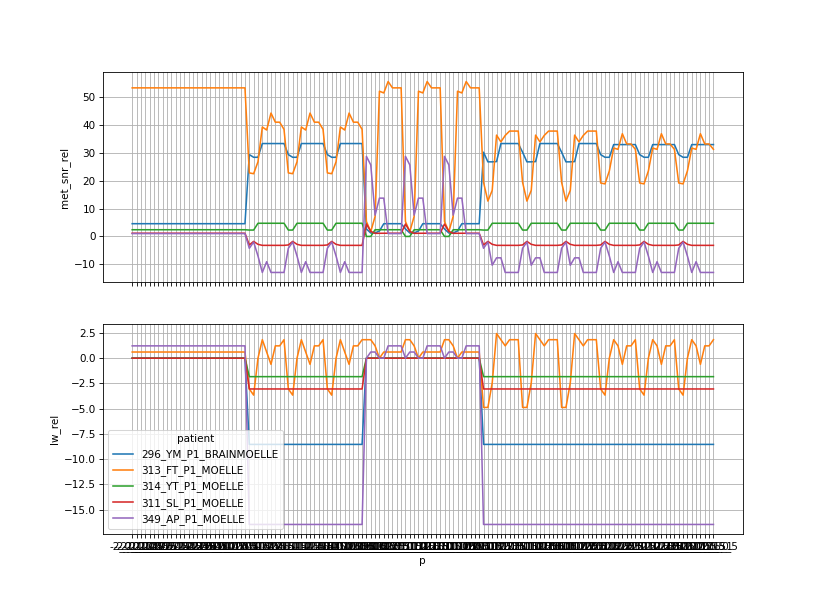

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [22]:
plt.close('all')

df = pd.read_pickle("./notebooks/optim_data_rejecting_results.pkl")

df["p"] = df["realign_performed"].astype(str) + "_" + df["auto_allowed_snr_change"].astype(str) + "_" +  df["moving_averages"].astype(str) + "_" + df["allowed_apodization"].astype(str)

patient_list = df["patient"].unique()
df["NAA_s_rel"] = 0
df["Cre_s_rel"] = 0
df["Cho_s_rel"] = 0
df["NAA_snr_rel"] = 0
df["Cre_snr_rel"] = 0
df["Cho_snr_rel"] = 0
df["lw_rel"] = 0

for p in patient_list:
    df_min = df.loc[(df["patient"] == p) & (df["realign_performed"] == 0)]

    df.at[df["patient"] == p, "NAA_s_rel"] = (df.loc[df["patient"] == p]["NAA_s"] - df_min["NAA_s"].min())/ df_min["NAA_s"].min() * 100.0
    df.at[df["patient"] == p, "Cre_s_rel"] = (df.loc[df["patient"] == p]["Cre_s"] - df_min["Cre_s"].min())/ df_min["Cre_s"].min() * 100.0
    df.at[df["patient"] == p, "Cho_s_rel"] = (df.loc[df["patient"] == p]["Cho_s"] - df_min["Cho_s"].min())/ df_min["Cho_s"].min() * 100.0

    df.at[df["patient"] == p, "NAA_snr_rel"] = (df.loc[df["patient"] == p]["NAA_snr"] - df_min["NAA_snr"].min())/ df_min["NAA_snr"].min() * 100.0
    df.at[df["patient"] == p, "Cre_snr_rel"] = (df.loc[df["patient"] == p]["Cre_snr"] - df_min["Cre_snr"].min())/ df_min["Cre_snr"].min() * 100.0
    df.at[df["patient"] == p, "Cho_snr_rel"] = (df.loc[df["patient"] == p]["Cho_snr"] - df_min["Cho_snr"].min())/ df_min["Cho_snr"].min() * 100.0

    df.at[df["patient"] == p, "lw_rel"] = df.loc[df["patient"] == p]["lw"] - df_min["lw"].min()


df["met_s_rel"] = df[["NAA_s_rel", "Cre_s_rel", "Cho_s_rel"]].max(axis=1)
df["met_snr_rel"] = df[["NAA_snr_rel", "Cre_snr_rel", "Cho_snr_rel"]].max(axis=1)

fig = plt.figure()
ax = fig.subplots(2, 1, sharex=True)
sns.lineplot(data=df, x="p", y="met_snr_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[1], legend='brief')
ax[1].grid('on')

We clearly see the 5 parts of the optimization:
1. no realigning / no data rejecting (-2), that's our reference
2. realigning + data rejecting (-1)
3. (no realigning) + data rejecting (0)
4. data rejecting + realigning (1)
5. realigning + data rejecting + realigning (2)

First let's remove the part 3 (0) which has high LW, not acceptable

<IPython.core.display.Javascript object>


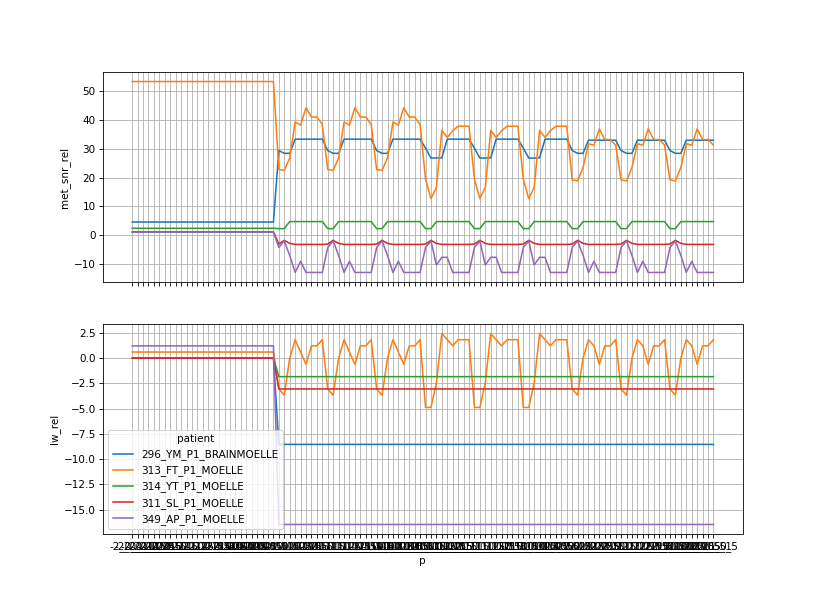

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [23]:
df = df.loc[df["realign_performed"] != 0]

fig = plt.figure()
ax = fig.subplots(2, 1, sharex=True)
sns.lineplot(data=df, x="p", y="met_snr_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[1], legend='brief')
ax[1].grid('on')

Now we can see that, doing the realigning before, after or both does not change much... Still, let's choose one approach:
* Both reduces SNR for some reason.
* Before increases for 313
* After increases for 349

Intuitively, let's choose before. Frequency shifts can and should be corrected. Data should not be discarded because of frequency shifts. Let's correct this before data discardment.

<IPython.core.display.Javascript object>


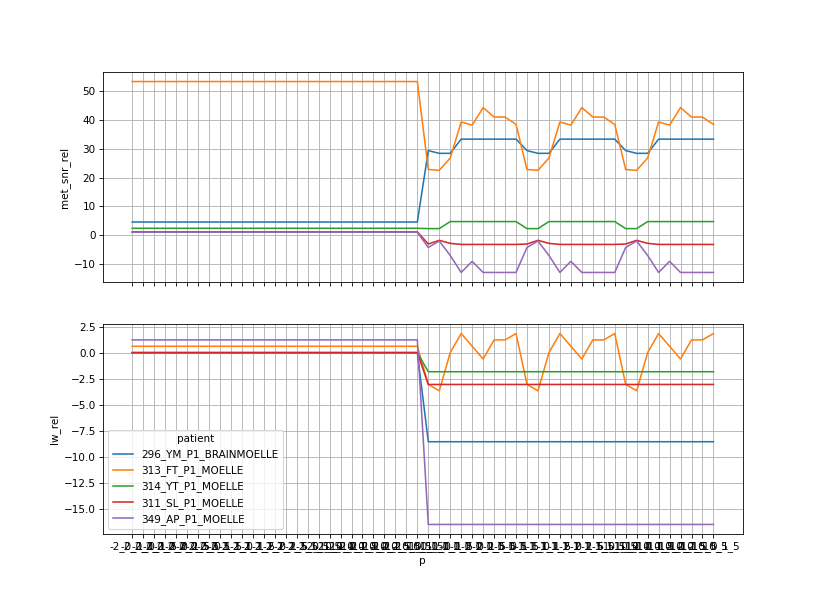

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [24]:
df = df.loc[df["realign_performed"] < 0]

fig = plt.figure()
ax = fig.subplots(2, 1, sharex=True)
sns.lineplot(data=df, x="p", y="met_snr_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[1], legend='brief')
ax[1].grid('on')

Now let's choose optimal *moving_averages* and *apodization* parameters... What do we see:
* Some datasets like to be averages and not apodized (313, 296, 314)
* Some datasets like to be apodized and not averaged (311, 349)

in order to increase their SNR by data discarding.

Ok. What differentiate those datasets?

In [17]:
df.groupby("patient")["NAA_snr"].mean().sort_values(ascending=False)

patient
314_YT_P1_MOELLE         29.142842
311_SL_P1_MOELLE         23.651300
296_YM_P1_BRAINMOELLE    15.581479
313_FT_P1_MOELLE         15.026703
349_AP_P1_MOELLE         13.662309
Name: NAA_snr, dtype: float64

Well, the general SNR(NAA) cannot differentiate these datasets... Maybe TR or breathing rate?

* 349_AP_P1_MOELLE         18
* 314_YT_P1_MOELLE         17
* 311_SL_P1_MOELLE         16
* 313_FT_P1_MOELLE         12
* 296_YM_P1_BRAINMOELLE    -

Nope. Maybe initial LW?

In [18]:
df.groupby("patient")["lw"].mean().sort_values(ascending=False)

patient
313_FT_P1_MOELLE         28.347439
349_AP_P1_MOELLE         22.888184
296_YM_P1_BRAINMOELLE    20.751953
311_SL_P1_MOELLE         19.836426
314_YT_P1_MOELLE         18.615723
Name: lw, dtype: float64

Actually, if only look at signal (s) and not SNR, ignoring noise which should not change with realigning and data discarding:

<IPython.core.display.Javascript object>


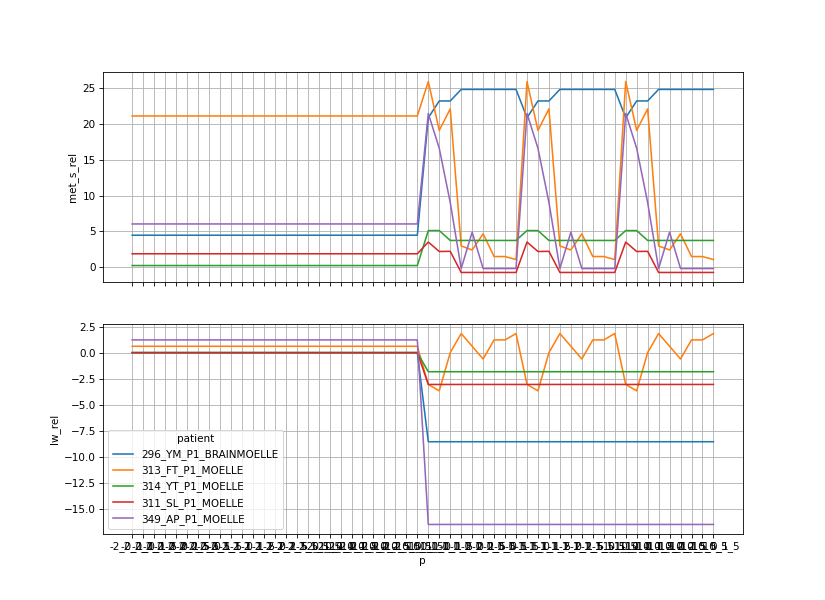

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [25]:
fig = plt.figure()
ax = fig.subplots(2, 1, sharex=True)
sns.lineplot(data=df, x="p", y="met_s_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[1], legend='brief')
ax[1].grid('on')

* We now clearly see that moving_averages should be set to 1.
* 2nd parameter (auto_allowed_snr_change) looks useless. Probably due to the way I coded the data discarding algorithm. Whatever the value auto_allowed_snr_change, it will try to enhance SNR and/or LW

<IPython.core.display.Javascript object>


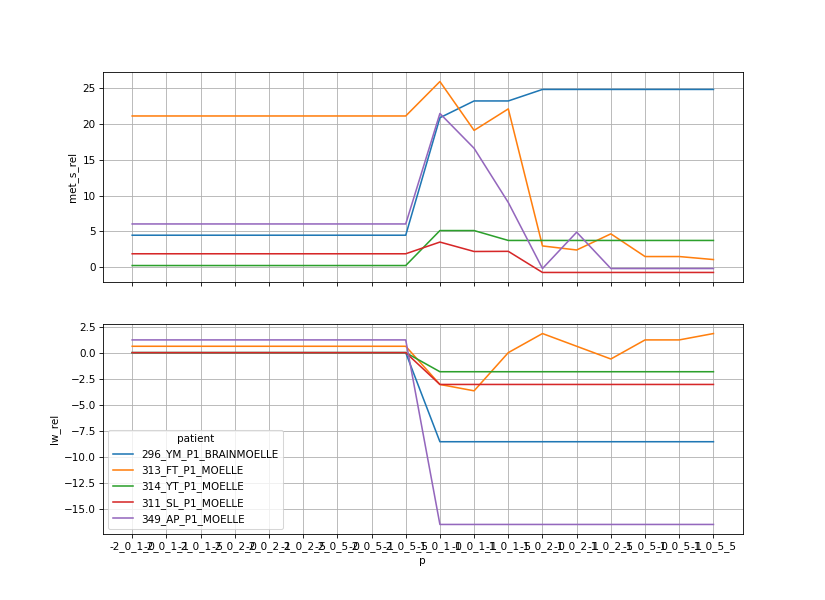

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [27]:
df = df.loc[df["auto_allowed_snr_change"] == 0]

fig = plt.figure()
ax = fig.subplots(2, 1, sharex=True)
sns.lineplot(data=df, x="p", y="met_s_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[1], legend='brief')
ax[1].grid('on')

All this to find that no apodization and no moving averages is the best. Those assumptions were wrong...

Let's check per metabolites:

<IPython.core.display.Javascript object>


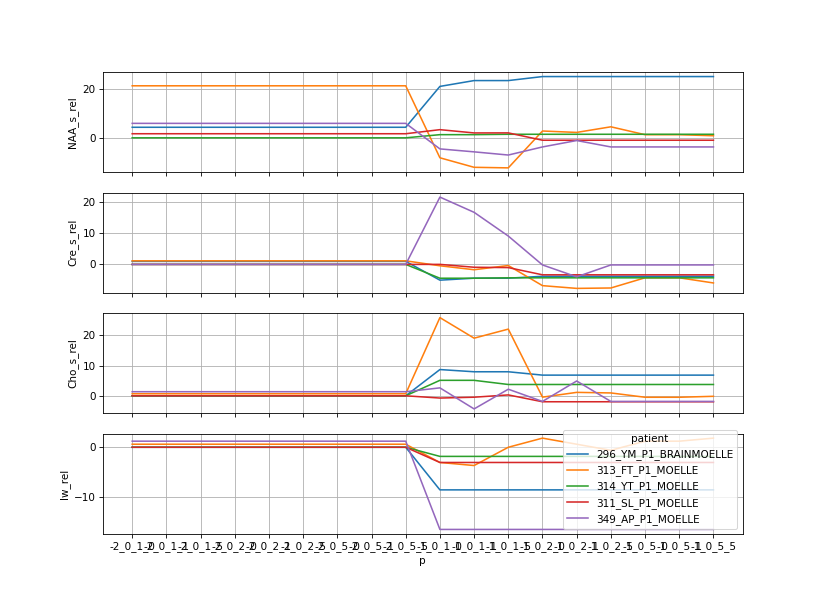

(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
(INFO) Using ca

In [28]:
fig = plt.figure()
ax = fig.subplots(4, 1, sharex=True)
sns.lineplot(data=df, x="p", y="NAA_s_rel", hue="patient", ax=ax[0], legend=False)
ax[0].grid('on')
sns.lineplot(data=df, x="p", y="Cre_s_rel", hue="patient", ax=ax[1], legend=False)
ax[1].grid('on')
sns.lineplot(data=df, x="p", y="Cho_s_rel", hue="patient", ax=ax[2], legend=False)
ax[2].grid('on')
sns.lineplot(data=df, x="p", y="lw_rel", hue="patient", ax=ax[3], legend='brief')
ax[3].grid('on')

### Conclusion

Mmmh okay. To conclude, the best way to proceed is:
* One unique frequency realignment, BEFORE data discardment
* No apodization, no moving averages
* Probalby 1% minimum SNR change allowed a good idea
